# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests

import scipy.stats as stats

In [3]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [6]:
html_page = requests.get(url) #Make a request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

In [51]:
save20 = soup.find('div', attrs={'class':"search-result-content"})


In [33]:
save20_res = save20.find_all('li', attrs={'class': 'grid-tile col-md-4 col-sm-12'})
len(save20_res)

36

In [34]:
#Grab 1 Treat Name to verify that code is grabbing the correct item
names = save20_res[0]
name1 = names.find('div', attrs={'class': 'product-name'})
treats = name1.find('h3', attrs={}).text
treats

'Greenies Regular Dental Dog Treats'

In [40]:
#Iterate through and get all of the treat names
all_treats = []
for h3 in save20_res:
    name1 = h3.find('div', attrs={'class': 'product-name'})
    treat = name1.find('h3', attrs={}).text
    all_treats.append(treat)
all_treats

['Greenies Regular Dental Dog Treats',
 'Greenies Petite Dental Dog Treats',
 'Greenies Large Dental Dog Treats',
 'Pedigree Dentastix Large Dog Treats',
 'Greenies 6 Month+ Puppy Petite Dental Dog Treats',
 'Greenies 6 Month+ Puppy Dental Dog Treats',
 'Greenies 6 Month+ Puppy Teenie Dental Dog Treats',
 'Greenies Teenie Dental Dog Treats',
 'Authority® Dental & DHA Stick Puppy Treats Parsley Mint - Gluten Free, Grain Free',
 'Pedigree Dentastix Large Dog Sticks',
 'Milk-Bone Brushing Chews Large Dental Dog Treats',
 'Pedigree Dentastix Triple Action Dental Dog Treats - Variety Pack',
 'Pedigree Dentastix Small/Medium Dog Sticks',
 'WHIMZEES Variety Value Box Dental Dog Treat - Natural, Grain Free',
 'Pedigree Dentastix Mini Dog Sticks',
 'Virbac® C.E.T.® VeggieDent® Tartar Control Dog Chews',
 'Milk-Bone Brushing Chews Dental Dog Treat',
 'Authority® Dental & DHA Rings Puppy Treats Parsley Mint - Gluten Free, Grain Free',
 'Pedigree Dentastix Large Dog Sticks',
 'Greenies Teenie Dog 

In [41]:
# load the data into a dataframe file
df = pd.DataFrame(all_treats)
df.head()

,0
0,Greenies Regular Dental Dog Treats
1,Greenies Petite Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Pedigree Dentastix Large Dog Treats
4,Greenies 6 Month+ Puppy Petite Dental Dog Treats


In [42]:
# save the data as a csv file
df.to_csv('part1.csv', index=False)

# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [3]:
data = pd.read_csv('data/part2.csv')
df = pd.DataFrame(data)
df.head()


,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [4]:
columns = df.columns
columns

Index(['salaries', 'NPS Score', 'eventOutcome'], dtype='object')

In [5]:
df.shape

(5000, 3)

In [6]:
# create a function that calculates the zscores of an array
def find_score(column):
    array = np.array(column)
    mean = np.mean(array)
    sigma = np.std(array)
    d = np.random.normal(mean, sigma, 5000)
    z_score = [(x - d.mean())/d.std() for x in d]
    return z_score
    

In [7]:
# calculate the zscore for each column and store them as a new column with the names used above
#salaries_zscores
salaries = df.salaries
salaries_zscores = find_score(salaries)
df['salaries_zscores'] = salaries_zscores

#NPS Score Zcores
nps_score = df['NPS Score']
nps_zscores = find_score(nps_score)
df['NPS Score_zscores'] = nps_zscores

#Event Outcome Zcores
eventOutcome = df['eventOutcome']
eventOutcome_zscores = find_score(eventOutcome)
df['eventOutcome_zscores'] = eventOutcome_zscores

df.head()



,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,1.946260,-1.101683,-1.067729
1,46777.0,-12.0,2,-1.636270,-0.522173,-0.250717
2,50013.0,50.0,5,-0.977261,-0.139001,-0.273644
3,48983.0,-13.0,0,-0.949301,1.651734,2.795559
4,50751.0,-11.0,6,0.786627,-0.459809,-0.441297


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

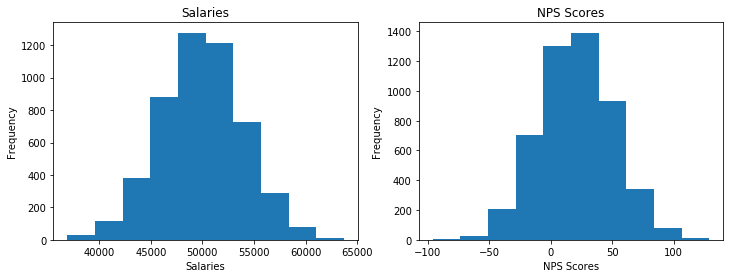

In [24]:
# plot for raw salaries and NPS Score data goes here

new_figure = plt.figure(figsize=(12,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.hist(df.salaries)
ax2.hist(df['NPS Score'])

ax.set_title('Salaries')
ax2.set_title('NPS Scores')

ax.set_ylabel('Frequency')
ax.set_xlabel('Salaries')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('NPS Scores')


plt.show()

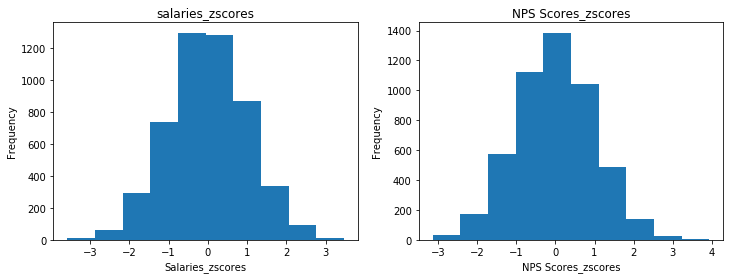

In [25]:
# plot for zscores for salaries and NPS Score data goes here

new_figure = plt.figure(figsize=(12,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.hist(df['salaries_zscores'])
ax2.hist(df['NPS Score_zscores'])

ax.set_title('salaries_zscores')
ax2.set_title('NPS Scores_zscores')

ax.set_ylabel('Frequency')
ax.set_xlabel('Salaries_zscores')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('NPS Scores_zscores')


plt.show()

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [42]:
import collections
x = df['eventOutcome']
counter = collections.Counter(x)
print(counter)

pmf = []
for key, val in counter.items():
    pmf.append(round(val/len(x), 2))
    
#print(counter.keys(), pmf)

Counter({4: 666, 7: 661, 3: 636, 0: 624, 6: 622, 1: 608, 2: 592, 5: 591})


Text(0.5, 0, 'Event Outcome')

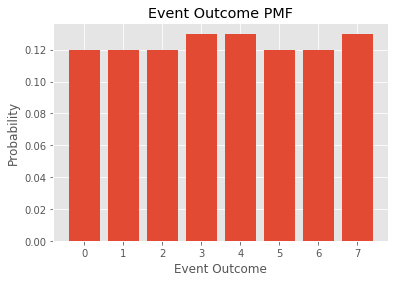

In [43]:
#Plot
plt.bar(counter.keys(), pmf)
plt.title('Event Outcome PMF')
plt.ylabel('Probability')
plt.xlabel('Event Outcome')

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

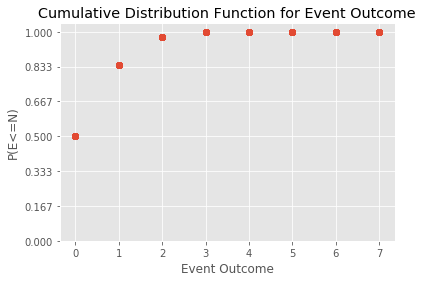

In [38]:
cdf = stats.norm.cdf(df['eventOutcome'])
plt.scatter(df['eventOutcome'], cdf)
plt.title ("Cumulative Distribution Function for Event Outcome");
plt.xlabel("Event Outcome")
plt.ylabel("P(E<=N)")
plt.yticks(np.linspace(0,1,num=7))
plt.show()



# Bonus:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

In [33]:
# find salaries with zscores <= 2.0 
small_z = np.where(df['salaries_zscores'] <= -2.0)
small_z

(array([  24,  115,  233,  253,  257,  273,  324,  331,  335,  347,  374,
         390,  443,  533,  611,  615,  755,  863,  866,  921, 1008, 1025,
        1029, 1121, 1211, 1334, 1336, 1433, 1498, 1505, 1525, 1573, 1583,
        1699, 1724, 1778, 1936, 2044, 2053, 2087, 2133, 2138, 2264, 2301,
        2339, 2387, 2470, 2501, 2563, 2649, 2661, 2668, 2684, 2739, 2745,
        2752, 2801, 2826, 2880, 2891, 2899, 2911, 2948, 3008, 3044, 3056,
        3127, 3274, 3313, 3335, 3367, 3390, 3475, 3496, 3520, 3532, 3541,
        3542, 3742, 3787, 3834, 3848, 3893, 3962, 4068, 4146, 4193, 4216,
        4220, 4264, 4278, 4431, 4481, 4501, 4612, 4639, 4640, 4656, 4673,
        4715, 4736, 4776, 4801, 4833, 4843, 4861, 4934, 4936, 4977]),)

In [40]:
# calculate skewness and kurtosis of NPS Score column
#Skewness
nps_array = np.array(df['NPS Score'])
nps_skew = stats.skew(nps_array)

print(nps_skew)

#Kurtosis
nps_kurt = stats.kurtosis(nps_array)
print(nps_kurt)

0.02450527688165856
-0.04212714461681166


# run the cell below to convert your notebook to a README for assessment

In [1]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md

[NbConvertApp] Converting notebook assessment.ipynb to markdown
[NbConvertApp] Support files will be in assessment_files/
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Writing 12858 bytes to assessment.md
